# Overview

This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

In [2]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 2.0 MB/s eta 0:00:000:00:01m eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.1
    Uninstalling numpy-2.0.1:
      Successfully uninstalled numpy-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.20 requires appdirs>=1.4.4, which is not installed.
yfinance 0.2.20 requires lxml>=4.9.1, which is not installed.
scipy 1.12.0 requires numpy<1.29.0,>=1.22.4, but you have numpy 2.1.0 which is incompatible.
xformers 0.0.26.post1 requires torch==2.3.0, but you have torch 2.4.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade --force-reinstall numpy scipy pandas

  Using cached numpy-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached numpy-2.1.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:01:04
Using cached pandas-2.2.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2024.1
    Uninstalling tzdata-2024.1:
      Successfully uninstalled tzdata-2024.1
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uni

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
cols=['ID', 'Topic', 'Sentiment', 'Text']
train = pd.read_csv(r"twitter_training.csv",names=cols)

In [3]:
train.head()

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


### Information about the dataframe

In [4]:
train.shape

(74682, 4)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [6]:
train.describe(include=object)

,Topic,Sentiment,Text
count,74682,74682,73996
unique,32,4,69491
top,Microsoft,Negative,"At the same time, despite the fact that there ..."
freq,2400,22542,172


In [9]:
train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

### Checking for null/missing values in the dataset

In [7]:
train.isnull().sum()

ID             0
Topic          0
Sentiment      0
Text         686
dtype: int64

In [8]:
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

ID           0
Topic        0
Sentiment    0
Text         0
dtype: int64

In [10]:
train.duplicated().sum()

np.int64(2340)

In [11]:
train.drop_duplicates(inplace=True)

In [12]:
train.duplicated().sum()

np.int64(0)

### Visualization of count of different topics

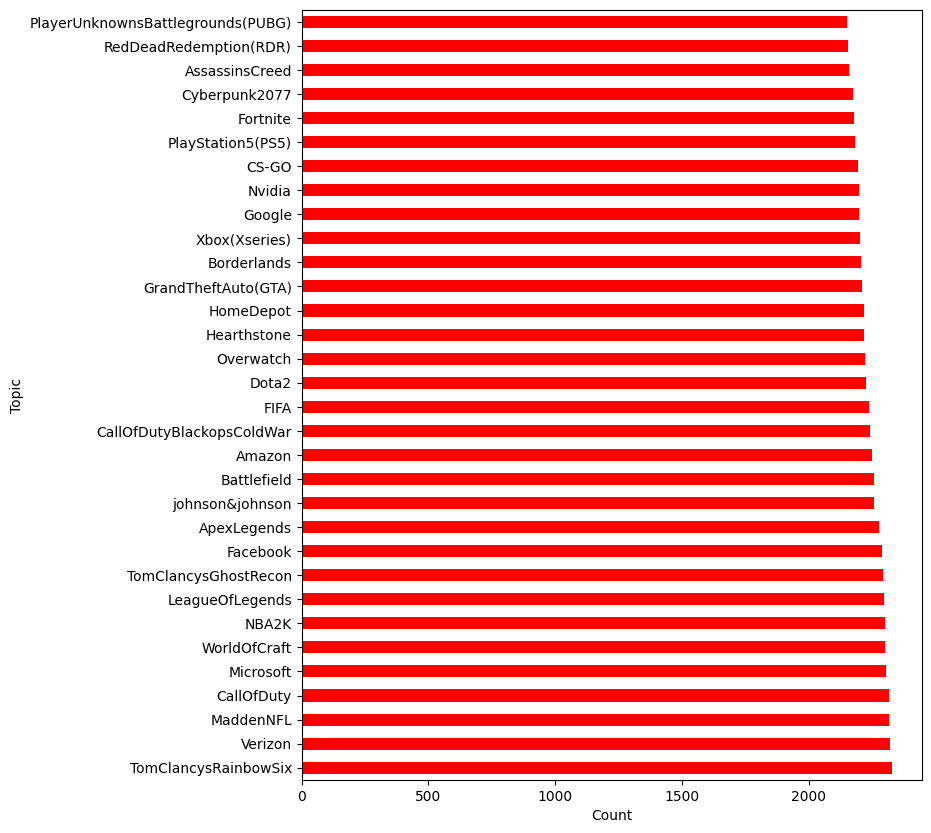

In [18]:
plt.figure(figsize=(8,10))
train['Topic'].value_counts().plot(kind='barh',color='r')
plt.xlabel("Count")
plt.show()

### Sentiment Distribution

/tmp/ipykernel_28837/4202381185.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Sentiment',data=train,palette='magma')


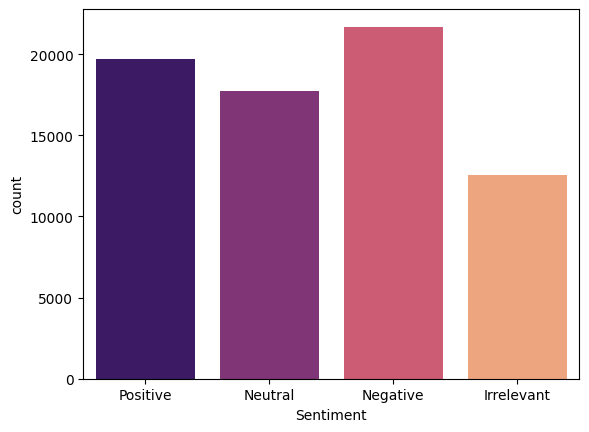

In [20]:
sns.countplot(x = 'Sentiment',data=train,palette='magma')
plt.show()

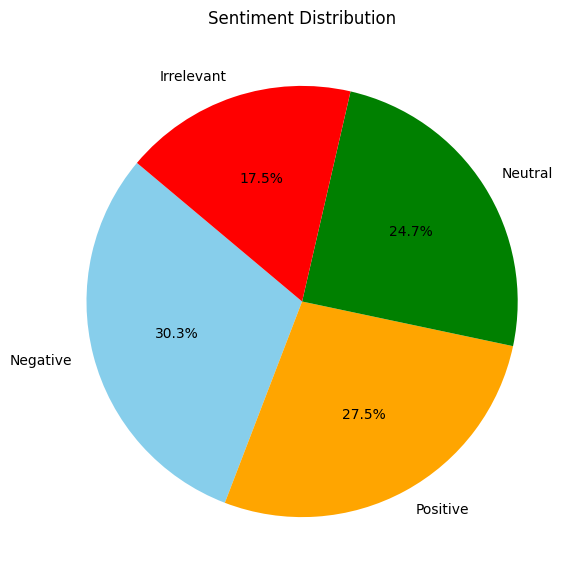

In [23]:
# Calculate the counts for each sentiment
sentiment_counts = train['Sentiment'].value_counts()

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=140, colors=['skyblue', 'orange', 'green', 'red', 'purple'])

plt.title('Sentiment Distribution')

# Show the plot
plt.show()

We can notice that for each topic, negative sentiment has the beggist part

In [24]:
train

,ID,Topic,Sentiment,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


### Sentiment Distribution Topic-wise

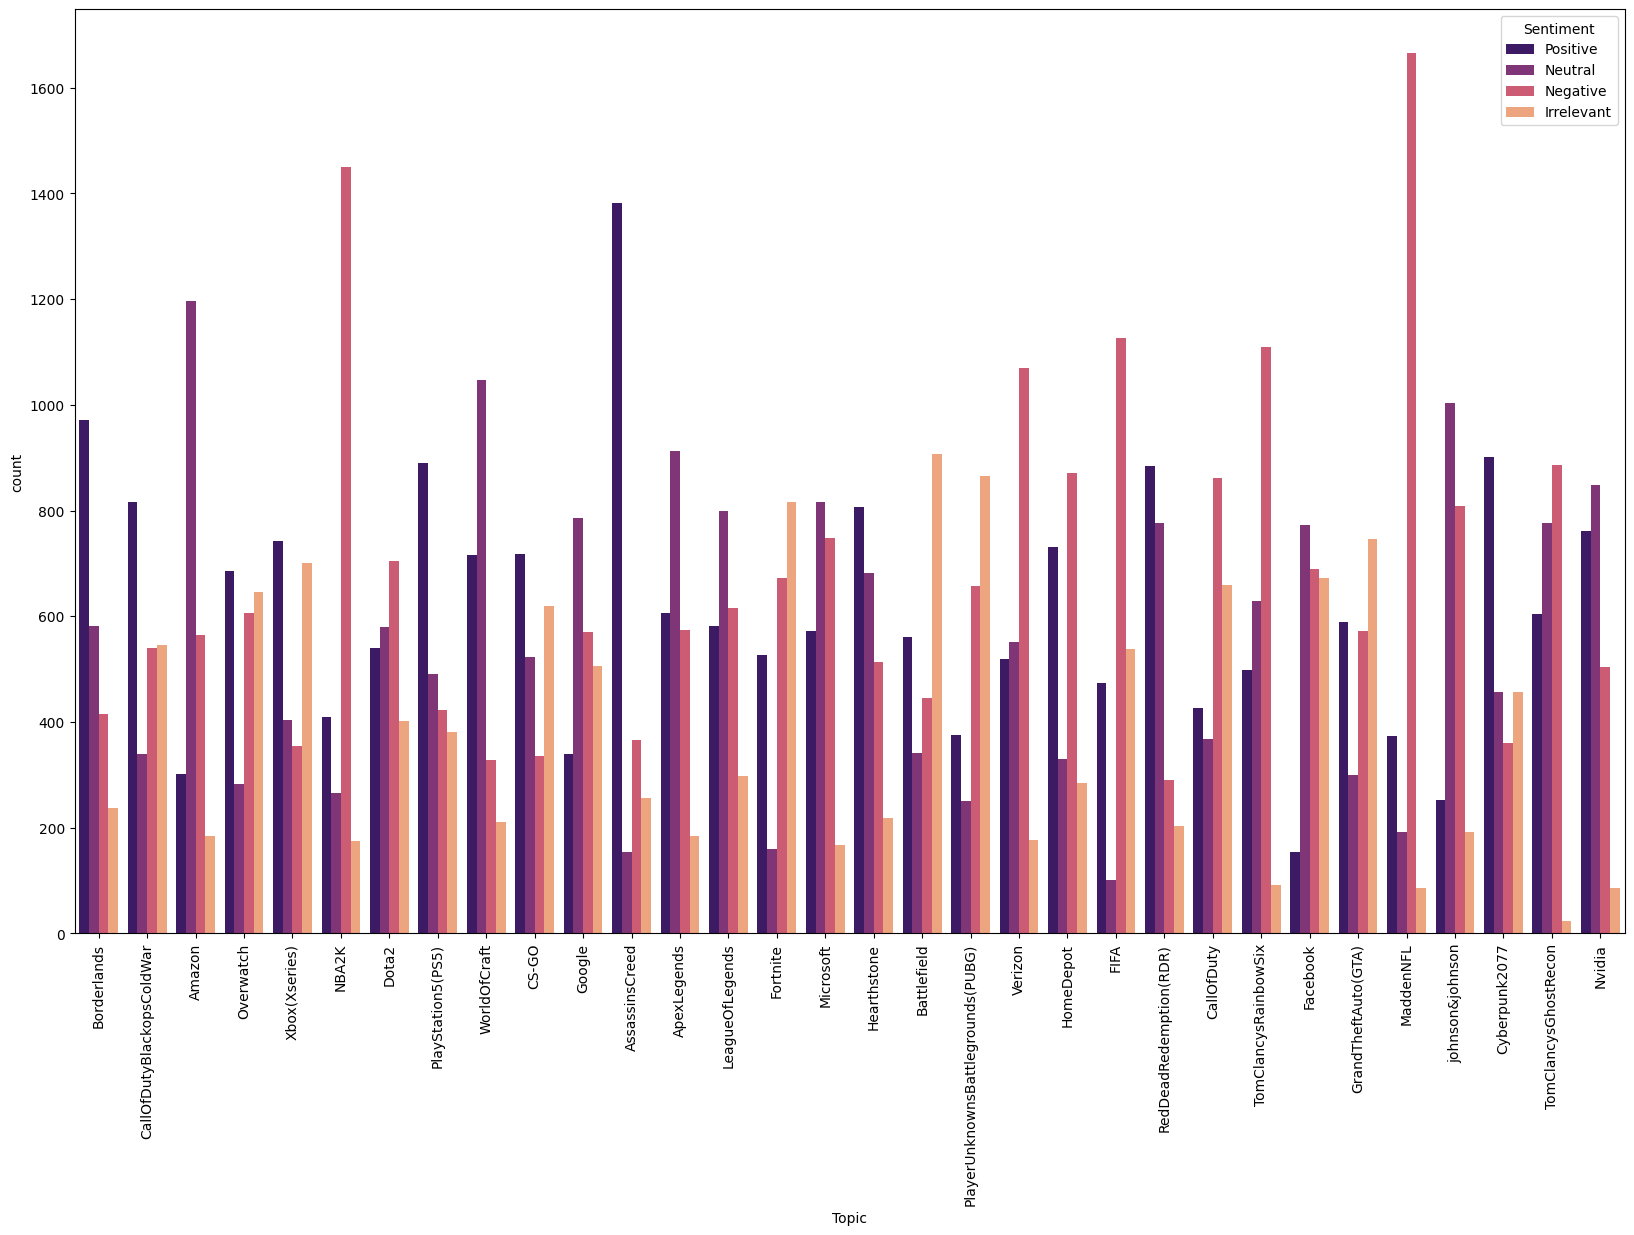

In [25]:
plt.figure(figsize=(20,12))
sns.countplot(x='Topic',data=train,palette='magma',hue='Sentiment')
plt.xticks(rotation=90)
plt.show()

In [26]:
## Group by Topic and Sentiment
topic_wise_sentiment = train.groupby(["Topic", "Sentiment"]).size().reset_index(name='Count')

# Step 2: Select Top 5 Topics
topic_counts = train['Topic'].value_counts().nlargest(5).index
top_topics_sentiment = topic_wise_sentiment[topic_wise_sentiment['Topic'].isin(topic_counts)]

/tmp/ipykernel_28837/3054202282.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='magma')


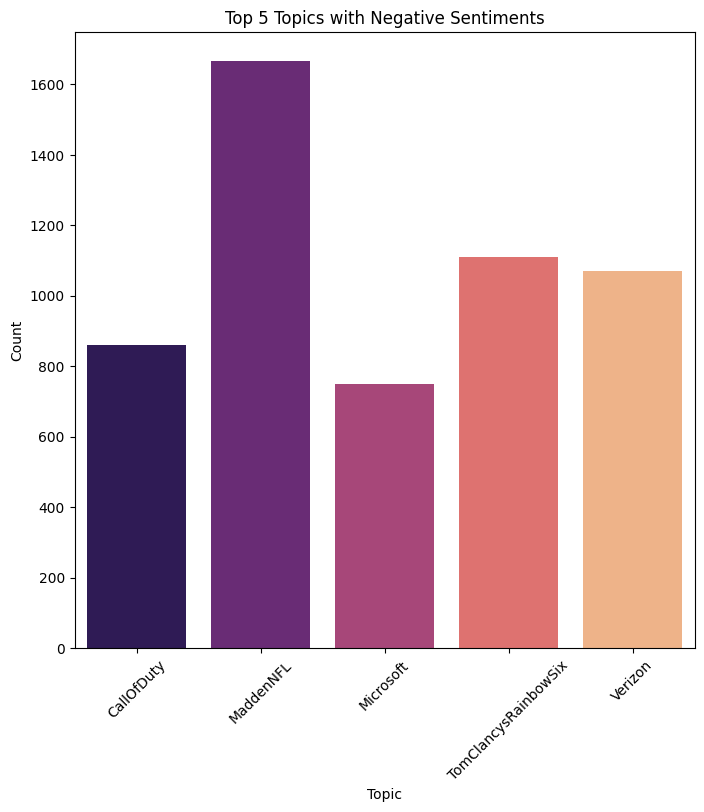

In [30]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Negative'], x='Topic', y='Count', palette='magma')
plt.title('Top 5 Topics with Negative Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Positive Sentiments

/tmp/ipykernel_28837/233992714.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Reds')


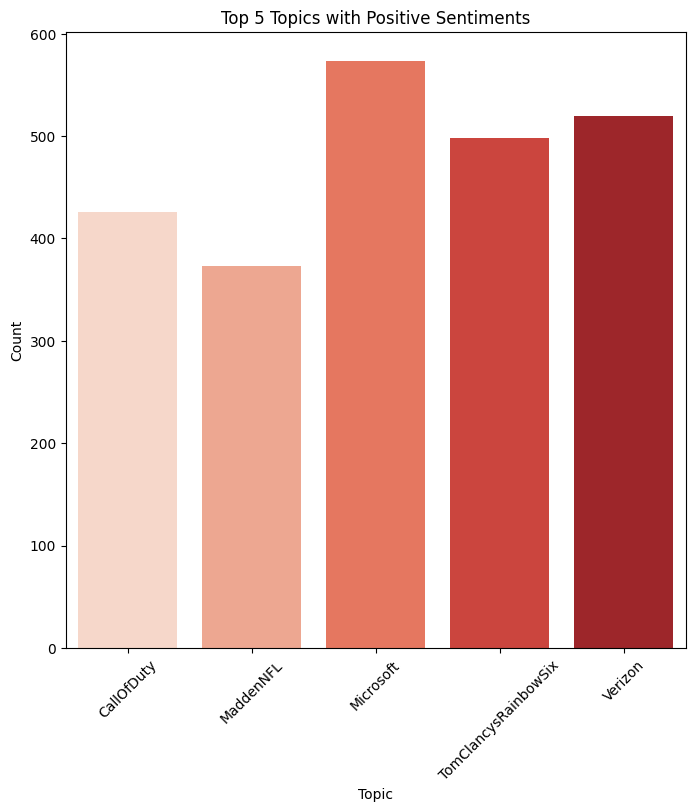

In [49]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Positive'], x='Topic', y='Count', palette='Reds')
plt.title('Top 5 Topics with Positive Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Neutral Sentiments

/tmp/ipykernel_28837/4120365723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Greens')


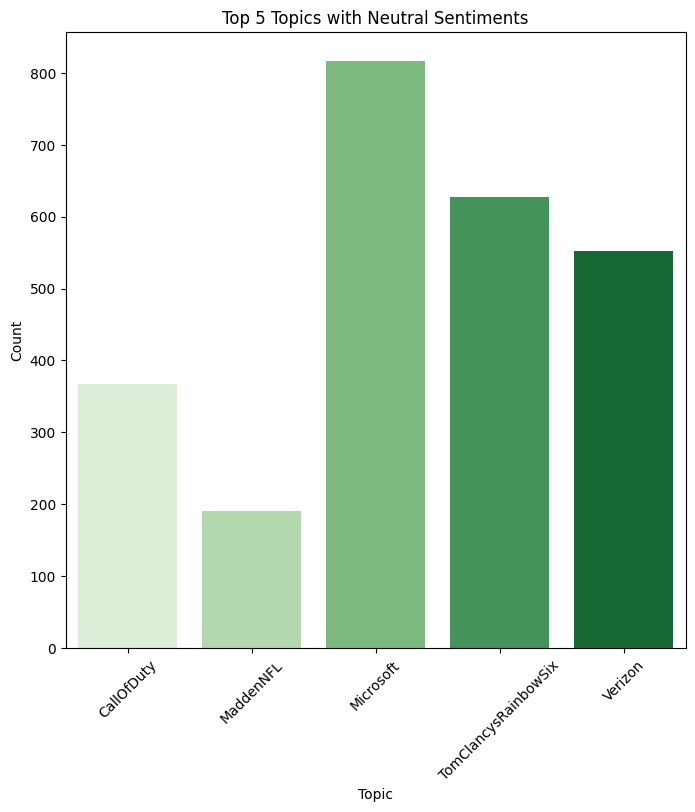

In [50]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Neutral'], x='Topic', y='Count', palette='Greens')
plt.title('Top 5 Topics with Neutral Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top 5 Topics with Irrelevant Sentiments

/tmp/ipykernel_28837/1825357124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Blues')


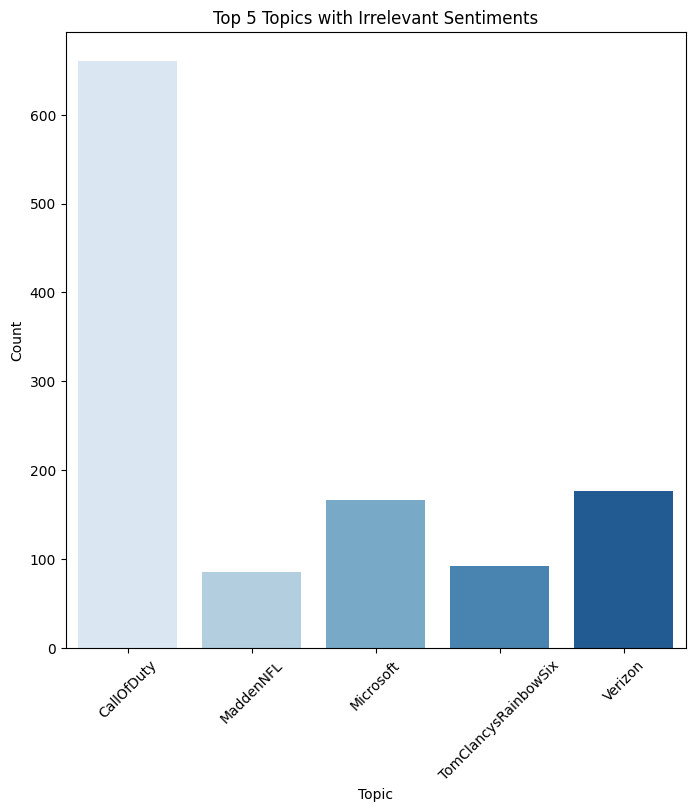

In [51]:
plt.figure(figsize=(8, 8))
sns.barplot(data=top_topics_sentiment[top_topics_sentiment['Sentiment'] == 'Irrelevant'], x='Topic', y='Count', palette='Blues')
plt.title('Top 5 Topics with Irrelevant Sentiments')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Sentiment Distribution in Google

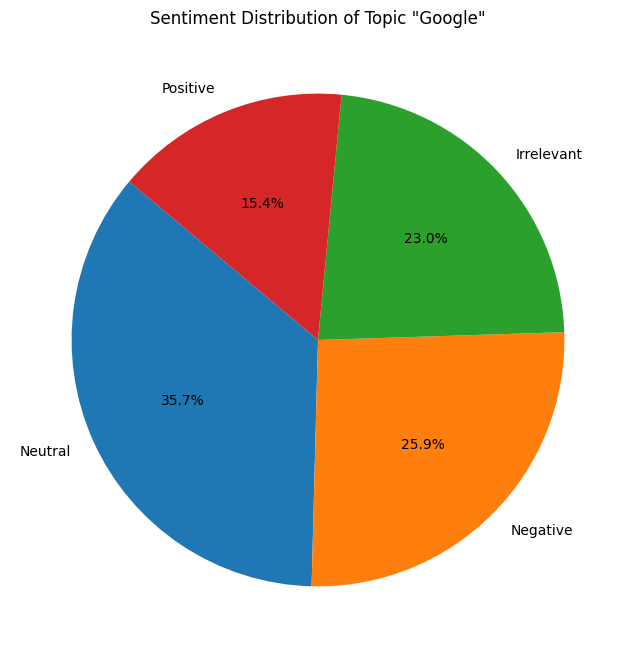

In [38]:
# Filter the dataset to include only entries related to the topic 'Google'
google_data = train[train['Topic'] == 'Google']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = google_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Google"')
plt.show()

### Sentiment Distribution in Microsoft

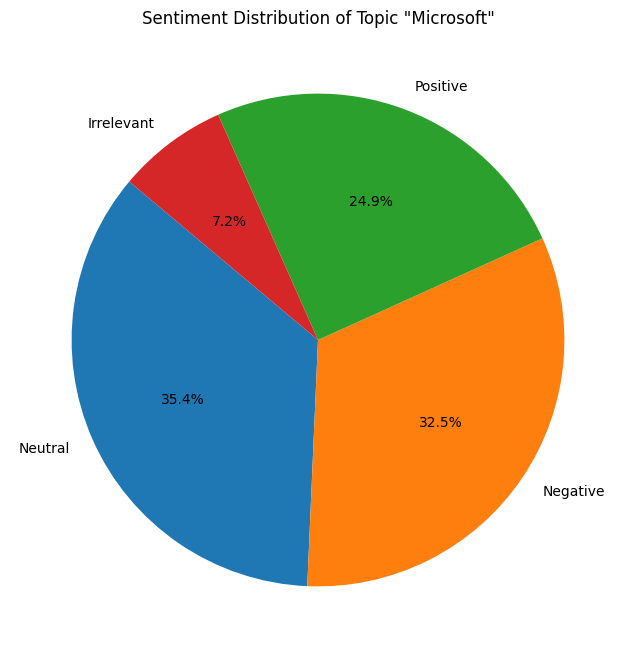

In [39]:
# Filter the dataset to include only entries related to the topic 'Microsoft'
ms_data = train[train['Topic'] == 'Microsoft']

# Count the occurrences of each sentiment within the filtered dataset
sentiment_counts = ms_data['Sentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution of Topic "Microsoft"')
plt.show()

Here we are introducing a new column which is the length of the text

In [40]:
train['msg_len'] = train['Text'].apply(len)

In [41]:
train

,ID,Topic,Sentiment,Text,msg_len
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,53
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,51
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,50
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,51
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,57
...,...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,128
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,117
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,125
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,159


### Plot of message length distribution for training data

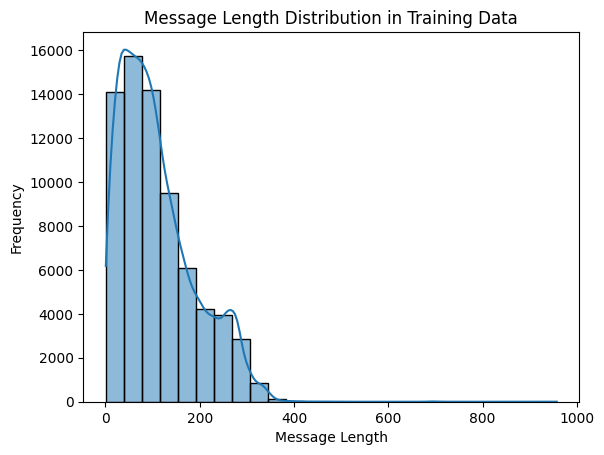

In [42]:
sns.histplot(train['msg_len'], bins=25,kde=True)
plt.title('Message Length Distribution in Training Data')
plt.ylabel('Frequency')
plt.xlabel('Message Length')
plt.show()

### Plot message length distribution by sentiment for training data

/tmp/ipykernel_28837/2364177331.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='magma', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])


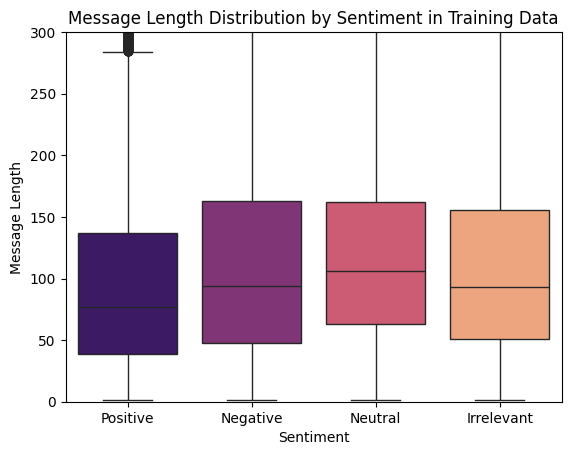

In [46]:
sns.boxplot(data=train, x=train['Sentiment'], y='msg_len', palette='magma', order=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.title('Message Length Distribution by Sentiment in Training Data')
plt.ylabel('Message Length')
plt.xlabel('Sentiment')
plt.ylim(0,300)
plt.show()  

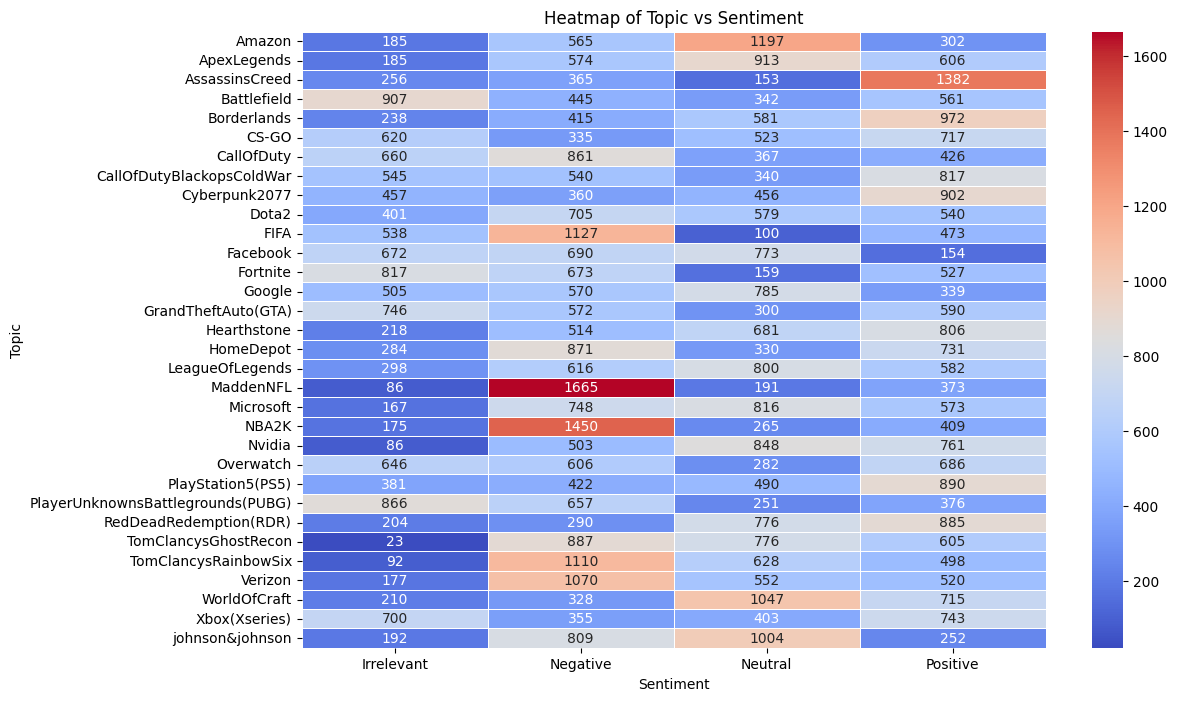

In [48]:
# Create the crosstab
crosstab = pd.crosstab(index=train['Topic'], columns=train['Sentiment'])

# Plot the heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(crosstab, cmap='coolwarm', annot=True, fmt='d', linewidths=.6)

# Add labels and title
plt.title('Heatmap of Topic vs Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Topic')

# Show the plot
plt.show()

# Conclusion: 

Based on the observations from the Twitter sentiment analysis task, several key insights can be drawn:

##### 1- Most Frequent Topic: 
The topic "TomClancyRainbowSix" emerges as the most frequent topic of discussion among the analyzed Twitter data.This seggests a big in this topic within the Twitter cmmunity.

##### 2-Sentiment Distribution: 
The sentiment analysis reveals that the majority of topics exhibit a negative sentiment, accounting for 30.3% of the sentiments observed. Following negative sentiment, positive sentiment is the next most prevalent, comprising 27.5% of the sentiments. Neutral sentiment closely follows at 24.7%, indicating a relatively balanced distribution between positive and neutral sentiments. Irrelevant sentiments, although less prevalent, still constitute a notable portion at 17.5%.

##### 3-Sentiment of Specific Topics:
Notably, topics such as "Google" and "Microsoft" predominantly exhibit a neutral sentiment. This may be related to the balance toward those topics.

##### 4-Message Length:
According to this analysis the mean length of texts is 100 word. Another noteworthy observation is that the majority of messages analyzed are under 400 words in length. This indicates that Twitter users tend to convey their sentiments concisely and succinctly within the platform's character limit. Furthermore, texts with positive sentiment are more likely to be shorter than texts with negative or neutral sentiments.

In conclusion, the sentiment analysis provides valuable insights into the prevailing attitudes and opinions within the twitter community, regarding various topics. While negative sentiments appear to be more common overall, there is a diverse range of sentiments expressed across different topics.